## Random Forest Model to predict whether employees in the tech industry are likely to seek mental health treatment or not

In [ ]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

**Data Importing and Cleaning**


In [2]:
#Importing the data
data = pd.read_csv('survey.csv')

#data.drop(columns = ['Timestamp', 'Age','Gender', 'Country', 'state', 'self_employed', 'work_interfere', 'no_employees','anonymity','leave', 'coworkers', 'supervisor', 'mental_vs_physical', 'comments'], inplace = True) #dropping unneeded features
data.drop(columns = ['Timestamp', 'Age','Gender', 'Country', 'state', 'comments'], inplace = True)
#data = data[~data.isin(["Don't know"]).any(axis=1)] #dropping all inputs of 'Don't Know'

data = data.reset_index(drop=True) #reset indexes after dropped colummns and rows

print(data.head(5))
print(data.shape)


  self_employed family_history treatment work_interfere    no_employees  \
0           NaN             No       Yes          Often            6-25   
1           NaN             No        No         Rarely  More than 1000   
2           NaN             No        No         Rarely            6-25   
3           NaN            Yes       Yes          Often          26-100   
4           NaN             No        No          Never         100-500   

  remote_work tech_company    benefits care_options wellness_program  ...  \
0          No          Yes         Yes     Not sure               No  ...   
1          No           No  Don't know           No       Don't know  ...   
2          No          Yes          No           No               No  ...   
3          No          Yes          No          Yes               No  ...   
4         Yes          Yes         Yes           No       Don't know  ...   

    anonymity               leave mental_health_consequence  \
0         Yes       Som

In [3]:
#changing yes/no into binary
data = data.replace({  #turn input into binary 0 and 1
    'Yes': 1,
    'No': 0,
    'Maybe': np.nan,
    'Not sure': np.nan,
    'Some of them': np.nan,
    "Don't know": np.nan
    })


C:\Users\ayoos\AppData\Local\Temp\ipykernel_29340\2150957091.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data = data.replace({  #turn input into binary 0 and 1


**Encoding Non Binary Features**

In [5]:
#encoding employee size feature
employee_size_mapping = {
    '1-5': 1,
    '6-25': 2,
    '26-100': 3,
    '100-500': 4,
    '500-1000': 5,
    'More than 1000': 6,
}
data['no_employees'] = data['no_employees'].replace(employee_size_mapping)

#encoding interferance feature
work_interfere_mapping = {
    'Never': 0,
    'Rarely': 1,
    'Sometimes': 2,
    'Often': 3,
    "NA": np.nan,
}
data['work_interfere'] = data['work_interfere'].replace(work_interfere_mapping)

#encoding leave feature
leave_mapping = {
    'Very easy': 0,
    'Somewhat easy': 1,
    'Somewhat difficult': 2,
    'Very difficult': 3,
    "Don't know": np.nan,
}
data['leave'] = data['leave'].replace(leave_mapping)

print(data)


      self_employed  family_history  treatment  work_interfere  no_employees  \
0               NaN               0          1             3.0             2   
1               NaN               0          0             1.0             6   
2               NaN               0          0             1.0             2   
3               NaN               1          1             3.0             3   
4               NaN               0          0             0.0             4   
...             ...             ...        ...             ...           ...   
1254            0.0               0          1             NaN             3   
1255            0.0               1          1             3.0             3   
1256            0.0               1          1             2.0             6   
1257            0.0               0          0             NaN             4   
1258            0.0               1          1             2.0             3   

      remote_work  tech_company  benefi

In [6]:
#data_corr = data.copy().replace({'Yes': 1, 'No': 0})
data_corr = data.copy()
# Calculate correlation of all features with the target variable
correlation = data_corr.corr()

# Show correlation of each feature with 'treatment'
treatment_corr = correlation['treatment'].drop('treatment')  # exclude self-correlation

# Sort by absolute correlation value (most to least useful)
top_features = treatment_corr.abs().sort_values(ascending=False)

# Display top 5 most correlated features
print("Top 5 features most correlated with treatment:\n")
print(top_features.head(10))

Top 5 features most correlated with treatment:

work_interfere               0.489901
family_history               0.377918
care_options                 0.278839
mental_health_consequence    0.161893
obs_consequence              0.156972
benefits                     0.155897
leave                        0.141128
coworkers                    0.110926
mental_vs_physical           0.084370
seek_help                    0.082636
Name: treatment, dtype: float64


**Building Random Forest Model**

In [ ]:
#defining features and labels
X = data.drop(columns=['treatment']) #all columns except treatment
#X = data[['work_interfere','family_history', 'care_options', 'benefits', 'obs_consequence']]

y = data['treatment']   #prediciting treatment

# train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [30]:
#defining random forest model
model = RandomForestClassifier(
    n_estimators=100,        # number of trees
    max_depth=10,            # how deep each tree can go
    min_samples_split=5,     # min samples to split a node
    min_samples_leaf=2,      # min samples in a leaf node
    max_features='sqrt',     # number of features considered at each split
    random_state=42
)


model.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

In [31]:
#testing model
y_pred = model.predict(X_test)


**Model Results & Evaluation**

In [33]:
#printing results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8055555555555556

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.79       129
           1       0.74      0.92      0.82       123

    accuracy                           0.81       252
   macro avg       0.82      0.81      0.80       252
weighted avg       0.82      0.81      0.80       252


Confusion Matrix:
 [[ 90  39]
 [ 10 113]]


In [34]:
#cross validating accuracy score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Accuracy Scores: [0.82178218 0.87128713 0.8358209  0.86567164 0.82089552]
Mean CV Accuracy: 0.8430914733264372


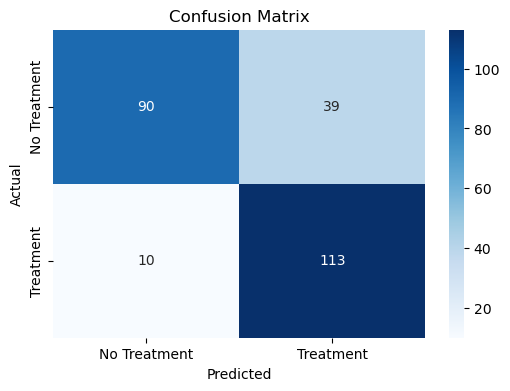

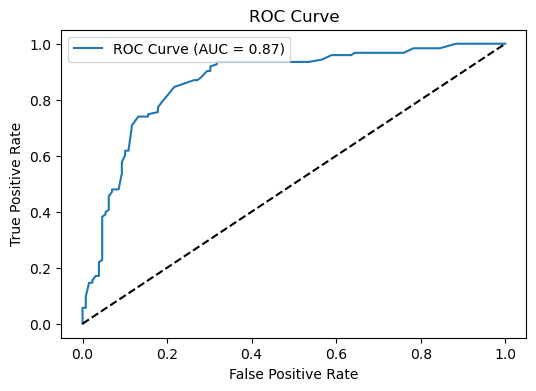

In [35]:
# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Treatment', 'Treatment'], yticklabels=['No Treatment', 'Treatment'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

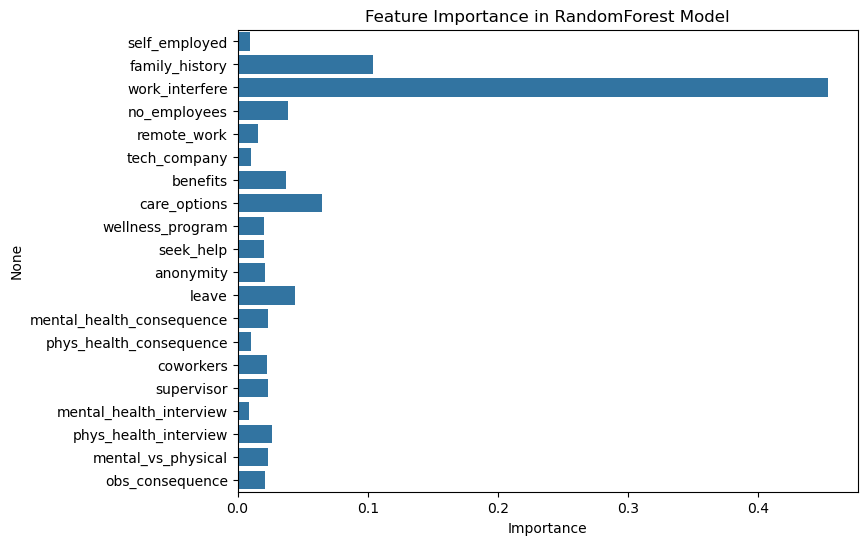

In [13]:
#displaying feature importance of model
importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importance in RandomForest Model')
plt.xlabel('Importance')
plt.show()